<a href="https://colab.research.google.com/github/jfdoppler/DNL_1c2021/blob/main/06_analisis_series_temporales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de señales temporales

(Gracias Facundo Fainstein!)


**Reconstrucción del espacio de fases**








**Ejemplo 1: Oscilador lineal**

Para el oscilador lineal, con solución:

$x(t) = sin(\omega t)$

reconstruya el espacio de fases a partir de un embedding con retrasos temporales:

$(x(t), x(t+\tau))$

Explore distintos valores de retraso temporal $\tau$. Compare el retraso temporal utilizado con un tiempo característico del problema.

 Compare con el espacio de fases original: $\left(x(t), \frac{dx}{dt}(t)\right)$. ¿Cómo se ve el embedding en la mínima dimensión (3) que indica el teorema de Takens?

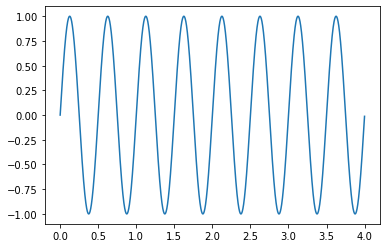

In [ ]:
#Importamos las librerias
import numpy as np
import matplotlib.pyplot as plt

#Armamos la solucion y el tiempo
#Paso temporal
dt = 0.001
#Vector de tiempos
t = np.arange(0, 4, dt)
#Frecuencia de oscilacion
f = 2
#Solucion
x = np.sin(2*np.pi * f * t)

#Armamos una figura para ver x vs t
plt.plot(t, x)

El periodo del sistema es:0.5s
El retraso temporal utilizado es:0.125s
El retraso en número de puntos es: 125


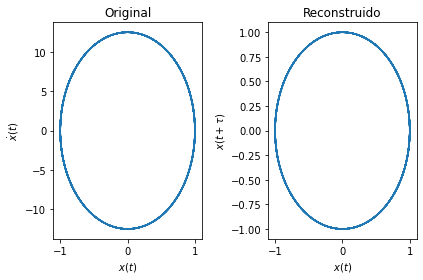

In [ ]:
#Armamos el espacio de fases original, derivamos x (analiticamente)
y = 2*np.pi * f * np.cos(2*np.pi *  f * t)

#Reconstruimos el espacio de fases
#Damos el paso temporal tau
tau = 0.25 * (1/f) #Un cuarto del periodo 
#En terminos de numero de puntos:
T = int(tau/dt)
print("El periodo del sistema es:"+str(1/f)+"s")
print("El retraso temporal utilizado es:"+str(tau)+"s")
print("El retraso en número de puntos es:", T)

#Hacemos el embedding de dimension 2:
#Definimos las listas donde guardamos la componente x e y del embedding
x_emb = x[:-T]
y_emb = x[T:]

#Graficamos para ver nuestra reconstrucción del espacio de fases y comparamos con el original
fig, ax = plt.subplots(1, 2, figsize=(6, 4))
ax[0].set_title("Original")
ax[0].plot(x, y)
ax[0].set_xlabel(r"$x(t)$")
ax[0].set_ylabel(r"$\dot{x}(t)$")

ax[1].set_title("Reconstruido")
ax[1].plot(x_emb, y_emb)
ax[1].set_xlabel(r"$x(t)$")
ax[1].set_ylabel(r"$x(t+\tau)$")
fig.tight_layout()

Ahora lo graficamos en tres dimensiones.

Text(0.5, 0, 'x(n+2T)')

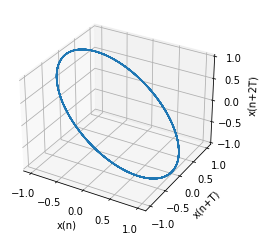

In [ ]:
#Armamos el embedding de dimension 3
x_emb_3 = x[:-2*T]
y_emb_3 = x[T:-T]
z_emb_3 = x[2*T:]


#Lo graficamos
fig = plt.figure(figsize=(4, 4))
ax = plt.axes(projection="3d")
ax.plot3D(x_emb_3, y_emb_3, z_emb_3)
ax.set_xlabel('x(n)')
ax.set_ylabel('x(n+T)')
ax.set_zlabel('x(n+2T)')


**Ejercicio:** Arme una función que tenga como entradas la serie temporal, la dimensión del embedding y el retraso temporal. De salida: el embedding en la dimensión correspondiente.

**Ejercicio 2:** Haga el embedding $\left(x, \dot{x}\right)$ pero estimando las derivadas a partir de los datos

**Ejemplo 2: Orbita de período 2**

Para una orbita de periodo 2, parametrizada por:

$x(t) = sin(\omega t) + \frac{3}{4} sin(\frac{\omega}{2}t)$

Realice un embedding de dimensión 2. Explore distintos valores de retraso temporal. Compare los retrasos temporales utilizados con escalas temporales del problema.

¿Es esta la dimensión correcta?

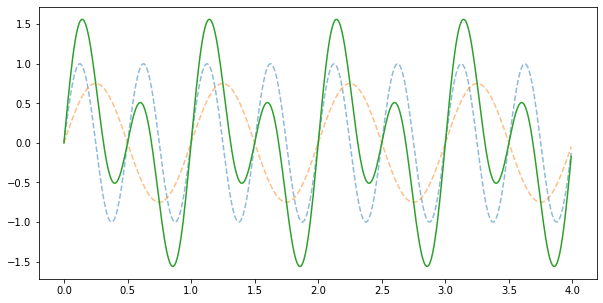

In [ ]:
#Armamos el vector de tiempos y la señal temporal
dt = 0.01
tiempo = np.arange(0, 4, dt)
#La frecuencia
f = 2
x = np.sin( 2*np.pi * f * tiempo ) + 0.75 * np.sin( 2 * np.pi * (f/2) * tiempo)
#Graficamos
plt.figure(figsize=(10,5))
plt.plot(tiempo, np.sin( 2*np.pi * f * tiempo ), '--', alpha=0.5)
plt.plot(tiempo, 0.75 * np.sin(  2 * np.pi * (f/2) * tiempo ), '--', alpha=0.5)

plt.plot(tiempo, x)

La escala mas rapida es:0.5s
El retraso en numero de puntos es: 12


Text(0, 0.5, '$x(n+T)$')

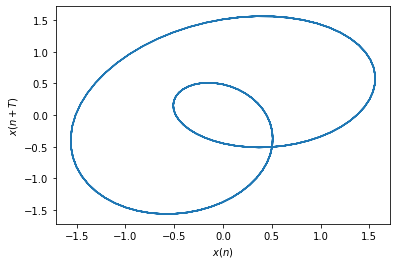

In [ ]:
#Armamos un embedding de dimension 2

#Defino la frecuencia de sampleo
fs = 1/dt
#Defino la escala temporal mas rapida
t_mas_rapida = 1/f
print("La escala mas rapida es:"+str(t_mas_rapida)+"s")

#Defino el retraso como un cuarto de la escala temporal mas rapida
T = int(0.25 * t_mas_rapida * fs)
print("El retraso en numero de puntos es:", T)
#Armamos el embedding
x_emb_2 = x[:-T]
y_emb_2 = x[T:]
#Lo graficamos
plt.plot(x_emb_2, y_emb_2)
plt.xlabel(r"$x(n)$")
plt.ylabel(r"$x(n+T)$")

**Ejercicio:** Haga un embedding en dimensión 3. Explore los delays.

# Segunda parte

**Ejemplo 3: Rossler**

Para el atractor de Rossler:

$\frac{dx}{dt}=-y-z$

$\frac{dy}{dt}=x+ay$

$\frac{dz}{dt}=b+z(x-c)$

Con $a=0.1 ; b=0.1; c=14$. 

**(a)**Integre el sistema. Observe $x(t)$, $y(t)$, $z(t)$. Grafique la trayectoria en el espacio de fases.



In [ ]:
def rk4(dxdt, x, t, dt, *args, **kwargs):
    x = np.asarray(x)
    k1 = np.asarray(dxdt(x, t, *args, **kwargs))*dt
    k2 = np.asarray(dxdt(x + k1*0.5, t, *args, **kwargs))*dt
    k3 = np.asarray(dxdt(x + k2*0.5, t, *args, **kwargs))*dt
    k4 = np.asarray(dxdt(x + k3, t, *args, **kwargs))*dt
    return x + (k1 + 2*k2 + 2*k3 + k4)/6

Text(0.5, 0, 'Tiempo')

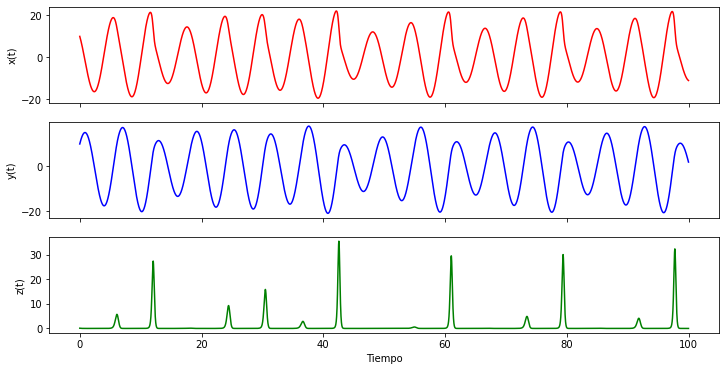

In [ ]:
#Importamos las librerias
import numpy as np
from matplotlib import pyplot as plt

a, b, c = 0.1, 0.1, 14

#Definimos el campo vector del rossler
def rossler(v, t, a, b, c):
    x, y, z = v[0], v[1], v[2]
    dxdt = - y - z
    dydt = x + a * y
    dzdt = b + z * (x - c)
    return [dxdt, dydt, dzdt]

#Damos un paso temporal en el que queremos la solución
dt = 0.01
#Definimos el vector de tiempos
t = np.arange(0, 100, dt)
#Damos una condición inicial
v0 = [10, 10, 0.1]
x = np.zeros(len(t))
y = np.zeros(len(t))
z = np.zeros(len(t))
x[0] = v0[0]
y[0] = v0[1]
z[0] = v0[2]
ix = 1
while ix < len(t):
    x[ix], y[ix], z[ix] = rk4(rossler, [x[ix-1], y[ix-1], z[ix-1]], t[ix-1], dt, a, b, c)
    ix += 1
#Armamos la figura 1
fig, ax = plt.subplots(3, sharex=True, figsize=(12,6))

ax[0].plot(t, x, 'r')
ax[0].set_ylabel('x(t)')
ax[1].plot(t, y, 'b')
ax[1].set_ylabel('y(t)')
ax[2].plot(t, z, 'g')
ax[2].set_ylabel('z(t)')
ax[2].set_xlabel('Tiempo')


Text(0.5, 0, 'z(t)')

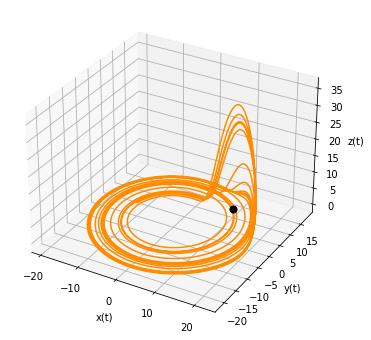

In [ ]:
#Graficamos la trayectoria en el espacio de fases
fig = plt.figure(figsize=(8,6))
ax = plt.axes(projection="3d")
ax.plot3D(x, y, z, 'darkorange')
ax.scatter(v0[0], v0[1], v0[2], s=50, color='k', label="ci")
ax.set_xlabel('x(t)')
ax.set_ylabel('y(t)')
ax.set_zlabel('z(t)')


**(b)** Arme un embedding de dimensión 3 para el atractor de Rossler. Pruebe con distintas variables y retrasos temporales

¿Qué pasa si combina dos de las tres variables? Por ejemplo:

$[x(n), x(n+T), y(n)]$

**Ejercicio:** Para el atractor de Rossler:

**(a)** Busque numéricamente una aproximación a la orbita de período 1 y alguna órbita de período 2.

**Ayuda:** Haga una integración larga y defina una sección de Poincarè (por ejemplo: $x=0$, $y<0$). Defina la orbita de periodo 1 como aquella para la cual puntos consecutivos tienen la minima distancia en pasajes consecutivos.

**(b)** Explore qué sucede con estas orbitas al realizar un embedding en x. ¿Las orbitas siguen enroscadas?

*Ayuda: Arme el embedding y repita lo realizado en (a).*


In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d

a, b, c = 0.1, 0.1, 14

#Definimos el campo vector del rossler
def rossler(v, t, a, b, c):
    x, y, z = v[0], v[1], v[2]
    dxdt = - y - z
    dydt = x + a * y
    dzdt = b + z * (x - c)
    return [dxdt, dydt, dzdt]

#Damos un paso temporal en el que queremos la solución
dt = 0.01
#Definimos el vector de tiempos
t = np.arange(0, 5000, dt)
#Damos una condición inicial
v0 = [10, 10, 0.1]
x = np.zeros(len(t))
y = np.zeros(len(t))
z = np.zeros(len(t))
x[0] = v0[0]
y[0] = v0[1]
z[0] = v0[2]
ix = 1
while ix < len(t):
    x[ix], y[ix], z[ix] = rk4(rossler, [x[ix-1], y[ix-1], z[ix-1]], t[ix-1], dt, a, b, c)
    ix += 1


Para buscar orbitas periodicas, armamos una sección de Poincarè. Una posible es $x=0$; $y<0$.

Text(0, 0.5, 'x')

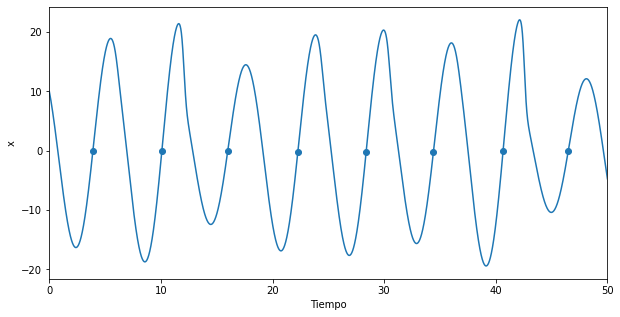

In [ ]:
nmap = np.where(np.logical_and(x[:-1]*x[1:] < 0, y[:-1] < 0))
#Graficamos el spline
plt.figure(figsize=(10,5))
plt.plot(t, x)
plt.scatter(t[nmap], x[nmap])
plt.xlim(0, 50)
plt.xlabel('Tiempo')
plt.ylabel('x')

Y si lo miramos en el espacio de fases se ve más claro qué hicimos.

Text(0.5, 0, 'z')

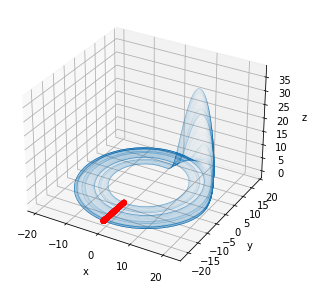

In [ ]:
#%% Miramos los puntos de la sección en 3D
fig = plt.figure(figsize=(10,5))
ax = plt.axes(projection='3d')
ax.plot3D(x, y, z, lw=0.01)
ax.scatter(x[nmap], y[nmap], z[nmap], c='r')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

Ahora que tenemos los puntos (y, z) sobre la sección, armamos el mapa.

Text(0, 0.5, '$y_{n+1}$')

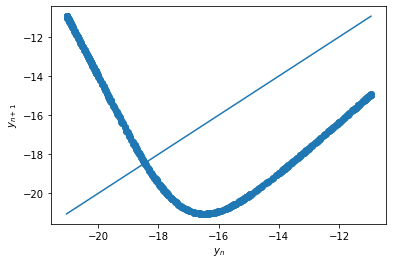

In [ ]:
ymap = y[nmap][:-1]
ysig = y[nmap][1:]
plt.scatter(ymap, ysig)
plt.plot([np.min(ymap), np.max(ymap)], [np.min(ymap), np.max(ymap)])
plt.xlabel(r'$y_{n}$')
plt.ylabel(r'$y_{n+1}$')


**Ejercicio**: Encuentre el punto fijo. Grafique la órbita de período 1

**Ejercicio**: buscar órbitas de período 2

**Bonus**: ¿Cómo se enroscan las órbitas de distintos períodos? ¿Y las órbitas de un embedding?

**Ejercicio**: Analice el oscilador de Duffing forzado

$\ddot{x}+\delta y + \alpha x + \beta x^{3} = \gamma cos(\omega t)$

con $\alpha=-1 ; \beta = 1; \delta=0.1; \gamma=0.35; \omega = 1.4$:

**(a)** Escriba el oscilador como un sistema dinámico autónomo haciendo el reemplazo $\theta=\omega t$. Integre el sistema y observe $x(t)$ y $\dot{x}(t)$, y la trayectoria en el espacio de fases.

**(b)** Arme la sección de Poincarè correspondiente a mirar el sistema cada un período del forzante. 

**(c)** Haga un embedding de x. ¿Qué dimensión tiene que elegir? Arme nuevamente la sección de Poincarè para la reconstrucción del espacio de fases. Compare con (b). 
